Have you ever found yourself scrolling through Netflix and thought to yourself, jee, I wonder how it knows what I like and what to recommend? In this article, I aim to provide a shallow dive into content recommendation systems and share the method I'm using to build my current startup idea.

At the end of this article is a demo where you can see a very simple implementation of a recommendation system.

## Recommendation Systems - What & Why?

Ever been swamped with a massive library of content and wondered how to dish out the right stuff to the right folks? Think about a streaming service with heaps of movies and TV shows, or a social media app trying to keep users glued to their screens. That's where recommendation systems come into play.

These systems aim to match users with the content they’re likely to love, but it isn’t a walk in the park. Every person’s different, and tastes can be as varied as a pack of kangaroos in the outback.

So this leads to recommendation systems having two important jobs:

1. **Recommend content**: serve up content that a user will resonate with
2. **Learn and adapt** Use feedback to fine-tune and improve future recommendations

And let's be honest, a little boost to *maximize shareholder value* doesn't hurt either.

## Goals for this Article

The goal of this article is to explain a vectorization-based content recommendation system. To keep this article succinct, it makes a few assumptions:

1. The data / content and user is pre-vectorized (look into methods to vectorize content and initialization methods to learn more)
2. Not using vector databases to keep things simple

## Vectorization and Categorization

In front of you exists a giant box of all sorts of toys - dinosaurs, puppets, trucks, puzzles, and so much more! How do you categorize the toys in the box? And how do you recommend the right toy to the right person?

A very simple approach is to think about different characteristics of each toy and rate each toy based off those characteristics. For example:

* plush-toy
* animal
* mental
* red
* blue
* green
* gender-bias
* educational

We can then take each and every toy in the box of toys and rate each toy by the characteristics above. Note that we will keep all values normalized between $[0, 1]$.

```
               plush-toy animal mental red blue green gender-bias educational
dinosaur       0.9       0.9    0.2    0.1 0.1  0.8   0.2         0.2
puppet         0.7       0.7    0.4    0.3 0.3  0.3   0.0         0.8
puzzle         0.0       0.1    0.9    0.3 0.3  0.3   0.0         0.8
truck          0.0       0.0    0.7    0.8 0.0  0.0   0.7         0.0
```

In the table above, each row represents a **vector**, and each vector describes an object.

## Using Vectors for Content Recommendations

In the example above, what if the box of toys contained 1000 toys? How can we recommend the best toy in the toy box?

We can start by **vectorizing** each toy in the toy box. Many methods for vectorization exist, though it's outside the of this article.

We can also vectorize the person for whom we are trying to recommend a toy for:

> Hi, I'm bob!
> 
> My favorite toy is Clifford, a big red dog plushie I have at home. I can't sleep without it! Find me a new toy so he has a friend too!

We can vectorize it to:

```
               plush-toy animal mental red blue green gender-bias educational
bob            0.9       0.9    0.0    0.9 0.0  0.0   0.0         0.0
```

And then, we can search our box of toys for the toy which has the most similar vector as bob!

## Cosine Similarity

We looked into our box and found another big red dog plushie. How do we know if this toy is a good recommendation for Bob?

One of the simplest approach is **cosine similarity**.

Cosine Similarity
: Measure of similarity between two non-zero vectors, [Wikipedia: Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity)

But why cosine similarity?

The reason why cosine similarity works is because we can treat each vector as a point in $k-$dimensional space. Cosine similarity is built upon the **dot prodct** of both vectors - a value which represents how far apart two vectors are from each other.

This is really hard to visualize in high-dimensional space, however, we can visualize it in 2D space with ease.

Below visualization using Python and Matplotlib, code hidden.

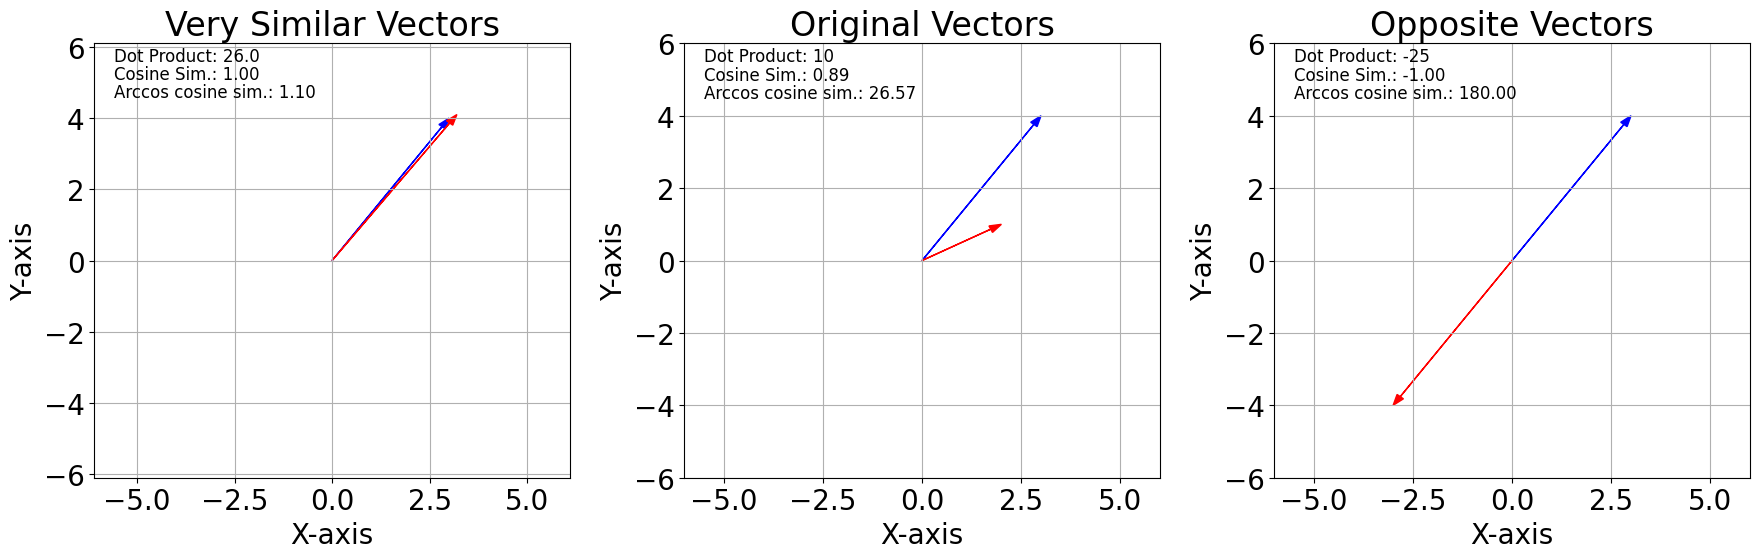

In [17]:
#% hidecode
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_vector(ax, v1, v2, title):
    # Calculate dot product and cosine similarity
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cosine_similarity = dot_product / (norm_v1 * norm_v2)
    arccos = math.acos(cosine_similarity) * 180 / math.pi
    
    # Plot vectors as arrows from the origin
    ax.arrow(0, 0, v1[0], v1[1], head_width=0.2, head_length=0.3, fc='blue', ec='blue', length_includes_head=True)
    ax.arrow(0, 0, v2[0], v2[1], head_width=0.2, head_length=0.3, fc='red', ec='red', length_includes_head=True)
    
    # Define plot limits
    max_val = max(np.max(np.abs(v1)), np.max(np.abs(v2))) + 2
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.grid(True)
    
    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(title)
    
    # Annotate the dot product and cosine similarity
    ax.text(-max_val + 0.5, max_val - 0.5, f'Dot Product: {dot_product}', fontsize=12)
    ax.text(-max_val + 0.5, max_val - 1.0, f'Cosine Sim.: {cosine_similarity:.2f}', fontsize=12)
    ax.text(-max_val + 0.5, max_val - 1.5, f'Arccos cosine sim.: {arccos:.2f}', fontsize=12)

# Define vector pairs for three scenarios:
# 1. Very similar vectors
v1_similar = np.array([3, 4])
v2_similar = np.array([3.2, 4.1])

# 2. Original vectors (for the middle graph)
v1_original = np.array([3, 4])
v2_original = np.array([2, 1])

# 3. Opposite vectors
v1_opposite = np.array([3, 4])
v2_opposite = np.array([-3, -4])

# Create subplots: one row, three columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_vector(axs[0], v1_similar, v2_similar, 'Very Similar Vectors')
plot_vector(axs[1], v1_original, v2_original, 'Original Vectors')
plot_vector(axs[2], v1_opposite, v2_opposite, 'Opposite Vectors')

plt.tight_layout()
plt.show()


### The Mathematics

The equation to calculate cosine similarity:

$$
\text{cosine similarity} = S_C(A, B) = \frac{A\cdot B}{\big\| A\big\| \big| B\big\|} = \cos\theta = \frac{ \sum\limits_{i=1}^n{A_iB_i} }{\sqrt{\sum\limits_{i=1}^n{A^2_i}}\cdot\sqrt{\sum\limits_{i=1}^n{B^2_i}}}
$$

In contrast, the formula to calculate the dot product is

$$
A\cdot B = \big\| A\big\|\big\| B\big\| \cos\theta
$$

where, for both these equations:

* $A$ is one vector
* $B$ is another vector
* $\big\| A\big\|$ and $\big\| B\big\|$ are the magnitudes of $A$ and $B$ respectively
* $\theta$ is the angle between both vectors

Notice how if we re-arrange the dot product equation to move the magnitudes to the left, we find the equation for cosine similarity:

$$
A\cdot B = \big\| A\big\|\big\| B\big\| \cos\theta \longrightarrow \frac{A\cdot B}{\big\| A\big\| \big| B\big\|} = \cos\theta
$$

In fact, cosine similarity is the cosine of the angle between both vectors. It's great because it bounds the similarity between $[-1, 1]$.

### Using Cosine Similarity for Matching

We know that high cosine similarity scores (near $1$) represent good matches. Thus, we just need to sort by cosine similarity to find a match!

## Learning / RLHF

It has now been an year and Bob wants to try new toys! Moreover, the types of toys he likes have changed. How can we learn and recommend to Bob some new toys? We can use a learning process to update Bob's vector to find toys he likes!

Let's start by giving an initial recommendation.

Recommendation 1: a blue monkey, ooh, and it has velcro so you can hang it from a tree or your mom's ceiling fan when she's not looking.

```
               plush-toy animal mental red blue green gender-bias educational
blue-monkey    0.9       0.9    0.0    0.0 0.9  0.0   0.0         0.0
```

We can then get Bob's feedback.

Bob: ew, that thing? It's ugly! Am I 5? No thanks!

Now, using Bob's feedback, we can update his vector.

$$V_\text{bob} = V_\text{bob} + \alpha \cdot F(\text{bob}, \text{blue-monkey}) \cdot V_{blue-monkey}$$

Where

* $V_\text{bob}$ is Bob's current vector
* $V_\text{blue-monkey}$ is the blue monkey's current vector
* $F(\text{bob}, \text{blue-monkey})$ is Bob's feedback, as a scalar between $[-1, 1]$. In this case, we will use $-1$.
* $\alpha$ is a **learning rate** - a hyperparameter which describes how fast we should update Bob's vector.

We can also update the toy's vector:

$$V_\text{blue-monkey} = V_\text{blue-monkey} + \beta \cdot F(\text{bob}, \text{blue-monkey}) \cdot V_{bob}$$

Where

* $V_\text{bob}$ and $V_\text{blue-monkey}$ are swapped compared to updating Bob's vector
* $\beta$ is the learning rate on the toy's vector.

Let's calculate, using $\alpha=0.1$ and $\beta=0.1$ and $F(\text{bob}, \text{blue-monkey})=-1$

```
                plush-toy animal mental red   blue  green gender-bias educational
bob (before)    0.9       0.9    0.0    0.9   0.0   0.0   0.0         0.0
blue-monkey (b) 0.9       0.9    0.0    0.0   0.9   0.0   0.0         0.0

bob (after)     0.81      0.81   0.0    0.9   -0.09 0.0   0.0         0.0
blue-monkey (a) 0.81      0.81   0.0    -0.09 0.9   0.0   0.0         0.0
```

Now, we have updated Bob's vector with his feedback, along with the toy's vector using his feedback!

## Demo - Recommender System for Æsop's fables

### Further Learning Tasks

1. Read the code, understand how it works
2. Update $\alpha$ and $\beta$ (`ALPHA` and `BETA`) variables and see how the learning changes. Try $\alpha = 0.5$ and $\beta = 0.3$, for example.
3. Add and remove `feedback` function calls
4. Identify how to user vector changes, as well as how a story's vector changes.

## Sources

* [Wikipedia: Recommender system](https://en.wikipedia.org/wiki/Recommender_system)
* [Datastax: What is Cosine Similarity](https://www.datastax.com/guides/what-is-cosine-similarity)
* [Wikipedia: Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity)